![Colorful%20creative%20about%20the%20team%20presentation%20.png](attachment:Colorful%20creative%20about%20the%20team%20presentation%20.png)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color='orange'>Nikhil Kumar Nayak</font> <font color='sky blue'>H2H11587K</font> <font color=#32CD32>MARTELL
</font>

## <font color='orange'>Objective of Tech Track (Machine Learning) </font>
### Build a Machine Learning model to predict the order amount that customers can place in the upcoming days.

## <font color='sky blue'>Business Overview</font>
### Introduction to B2B Operations:
The B2B world operates differently from the B2C or C2C world. Businesses work with other businesses on credit. When a buyer business orders goods from the seller business, the seller business issues an invoice for the same. This invoice for the goods contains various information like the details of the goods purchased and when it should be paid.

## <font color=#32CD32>Data Dictionary</font>

CUSTOMER_ORDER_ID: Unique identifier for an order id.

SALES_ORG: Unique identifier for sales organization.

DISTRIBUTION_CHANNEL: The country where the shipment has been delivered.

DIVISION: Region coverage of the customer

RELEASED_CREDIT_VALUE: Total credit value the customer possesses

PURCHASE_ORDER_TYPE: Denotes the category of the Purchase Order

COMPANY_CODE: the smallest organizational unit for which a complete, self-contained set of accounts can be drawn up

ORDER_CREATION_DATE: The date on which the order was created in the ERP.

ORDER_CREATION_TIME: The time on which the order was created in the ERP.

CREDIT_CONTROL_AREA: an organizational unit for specifying and controlling customer credit limits.

SOLD_TO_PARTY: Unique identifier for the person or organization who placed the order

ORDER_AMOUNT: all Purchase Prices referenced in any Purchase Order(s) and thus the total, accumulated and aggregated sum of each and every Purchase Price and increases/decreases hereof.

REQUESTED_DELIVERY_DATE: The requested date of delivery by the customer.

ORDER_CURRENCY: the currency in which the order was billed and is expected to be paid in.

CREDIT_STATUS: Indicates the credit health of a particular customer.

CUSTOMER_NUMBER: Unique identifier for a particular customer.

# Milestone 1- <font color='orange'>Data Sanity ( by using Numpy and Pandas)</font>

<font color='orange'>Data Sanity</font> refers to the quality and reliability of data, ensuring that it is accurate, consistent, and complete. In the context of data analysis and decision-making, data sanity is crucial because it forms the foundation for generating meaningful insights and making informed decisions.

In [ ]:
import numpy as np
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/INTERNSHIPS AND PLACEMENTS/HIGHRADIUS/Project/Order Amount Prediction/Final.csv")

In [ ]:
# Check the description of the DataFrame
print(df.describe())

       CUSTOMER_ORDER_ID     SALES_ORG  COMPANY_CODE  ORDER_CREATION_DATE  \
count       1.101925e+06  1.101925e+06  1.101925e+06         1.101925e+06   
mean        8.763187e+08  3.304891e+03  3.431364e+03         2.022032e+07   
std         7.088594e+07  6.958920e+02  5.483805e+02         1.426756e+02   
min         7.534520e+08  2.100000e+03  5.900000e+01         2.022010e+07   
25%         8.149522e+08  2.702000e+03  3.260000e+03         2.022021e+07   
50%         8.763963e+08  3.305000e+03  3.660000e+03         2.022032e+07   
75%         9.376832e+08  3.908000e+03  3.670000e+03         2.022042e+07   
max         9.990063e+08  4.510000e+03  4.260000e+03         2.022060e+07   

       ORDER_CREATION_TIME  SOLD_TO_PARTY  REQUESTED_DELIVERY_DATE  \
count         1.101925e+06   1.101925e+06             1.101925e+06   
mean          1.340316e+05   8.763265e+08             2.022035e+07   
std           6.503618e+04   7.090306e+07             1.751912e+03   
min           0.000000e+00

In [ ]:
# Check the shape of the DataFrame
print(df.shape)

(1101925, 16)


In [ ]:
# Check DataFrame information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

In [ ]:
# Check for null values in the DataFrame
print(df.isnull().sum())

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


In [ ]:
# Replace all null values with "NaN"
df = df.replace(np.nan, "NaN")

In [ ]:
# Change the format of date columns to datetime64 with the format "%Y%m%d"
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'], format="%Y%m%d")
df['REQUESTED_DELIVERY_DATE'] = pd.to_datetime(df['REQUESTED_DELIVERY_DATE'], format="%Y%m%d")

In [ ]:
# Sanity check - Check how many records have order date greater than delivery date
print(df[df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE']].shape[0])

27142


In [ ]:
# Remove records where order date is greater than delivery date
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]

In [ ]:
# Check the number of records where the "ORDER_AMOUNT" field has "-"
print(df[df['ORDER_AMOUNT'] == '-'].shape[0])

0


In [ ]:
# Replace "-" with "" in the "ORDER_AMOUNT" field
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].replace('-', '')

In [ ]:
# Check the number of records where the "ORDER_AMOUNT" field has ","
print(df[df['ORDER_AMOUNT'].str.contains(',')].shape[0])

1073406


In [ ]:
# Replace "," with "." in the "ORDER_AMOUNT" field
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].str.replace(',', '.')

In [ ]:
# Count the number of records where the order date and delivery date are the same
print(df[df['ORDER_CREATION_DATE'].dt.date == df['REQUESTED_DELIVERY_DATE'].dt.date].shape[0])

100437


In [ ]:
# Count the number of records for each currency type using the "ORDER_CURRENCY" field
currency_counts = df['ORDER_CURRENCY'].value_counts()
print(currency_counts)

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64


In [ ]:
import pandas as pd
# Define the exchange rates
exchange_rates = {
 'USD': 1,
 'EUR': 1.08,
 'AUD': 0.65,
 'CAD': 0.74,
 'GBP': 1.24,
 'MYR': 0.22,
 'PLN': 0.24,
 'AED': 0.27,
 'HKD': 0.13,
 'CHF': 1.11,
 'RON': 0.22,
 'SGD': 0.74,
 'CZK': 0.045,
 'HU1': 0.0029,
 'NZD': 0.61,
 'BHD': 2.65,
 'SAR': 0.27,
 'QAR': 0.27,
 'KWD': 3.25,
 'SEK': 0.094
}
# Convert ORDER_AMOUNT column to numeric
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
# Create a new column "amount_in_usd" and convert non-USD currencies to USD
df['amount_in_usd'] = df['ORDER_AMOUNT'] * df['ORDER_CURRENCY'].map(exchange_rates)
# Display the modified dataframe
print(df)

         CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION  \
0                946851639       3537  United States of America  South-Region   
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VAL

In [ ]:
#Checking for values “0” in the “'amount_in_usd” column
(df['amount_in_usd'] == 0).sum()

167

In [ ]:
#Creating a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUM
df["unique_cust_id"] = df["CUSTOMER_NUMBER"].astype(str) +df['COMPANY_CODE'].astype(str)
print(df["unique_cust_id"])

0            123118073220
1            123118073220
2            121187583260
3          12104997703290
4          12103514003290
                ...      
1101920    12103318044260
1101921    12103318044260
1101922    12103318114260
1101923    12103318114260
1101924    12103318044260
Name: unique_cust_id, Length: 1101925, dtype: object


# Milestone 2- <font color='sky blue'>EDA</font>

<font color='sky blue'>EDA</font> which stands for Exploratory Data Analysis, is a critical step in the data analysis process. It involves examining and summarizing data to gain insights, identify patterns, and understand the underlying structure of the dataset. EDA plays a crucial role in uncovering valuable information, guiding further analysis, and making informed decisions.

### Histogram on DISTRIBUTION_CHANNEL

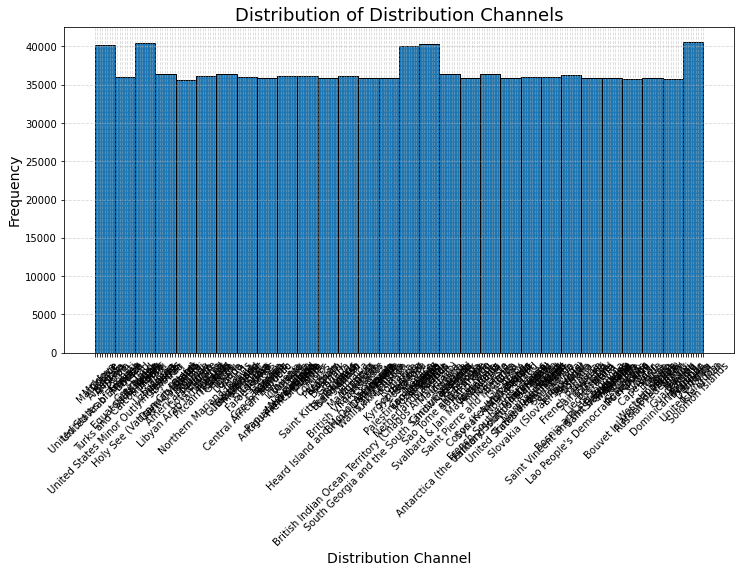

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the histogram
plt.hist(df['DISTRIBUTION_CHANNEL'], bins=30, edgecolor='black')

# Set labels and title
plt.xlabel('Distribution Channel', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Distribution Channels', fontsize=18)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Pie Chart on ORDER_CURRENCY

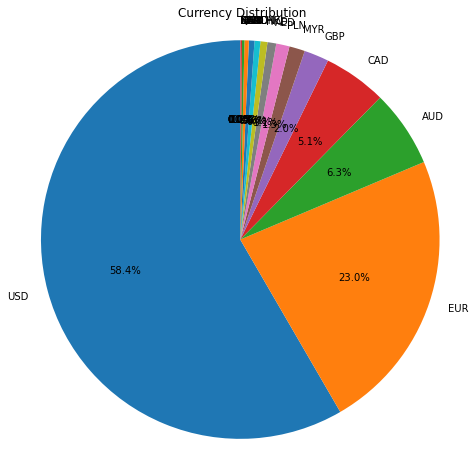

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts of each currency
currency_counts = df['ORDER_CURRENCY'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the pie chart with percentage labels
plt.pie(currency_counts, labels=currency_counts.index, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Currency Distribution')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

### Line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

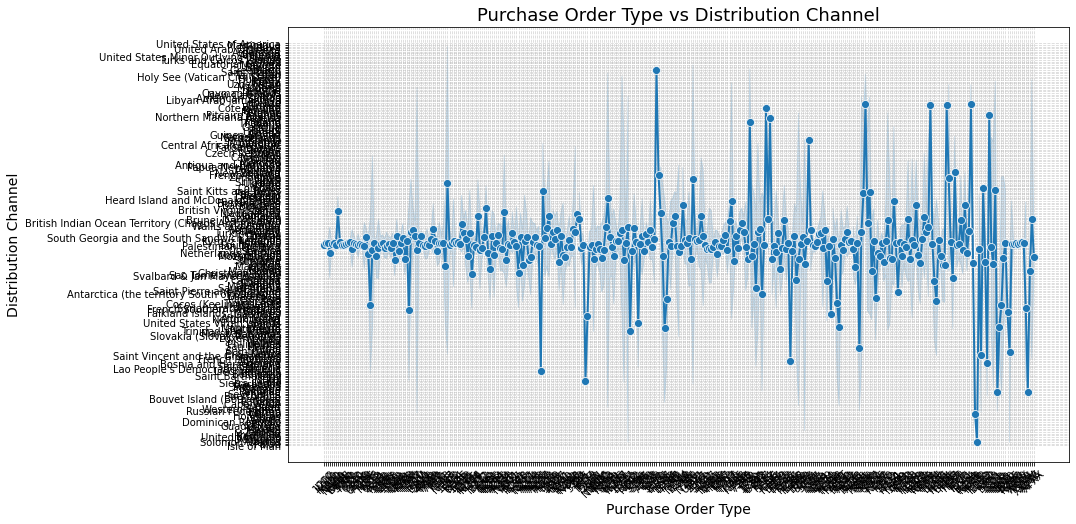

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 8))

# Plot the line plot
sns.lineplot(data=df, x='PURCHASE_ORDER_TYPE', y='DISTRIBUTION_CHANNEL', marker='o', markersize=8, linewidth=2)

# Set labels and title
plt.xlabel('Purchase Order Type', fontsize=14)
plt.ylabel('Distribution Channel', fontsize=14)
plt.title('Purchase Order Type vs Distribution Channel', fontsize=18)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Line plot on ORDER_CREATION_DATE and amount_in_usd

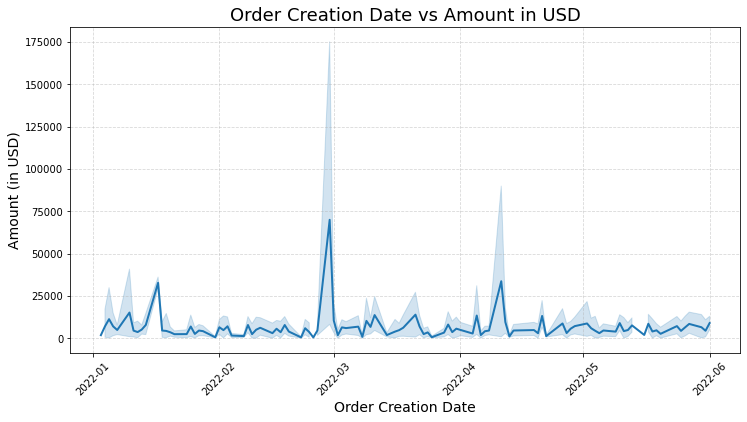

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the line plot
sns.lineplot(data=df, x='ORDER_CREATION_DATE', y='amount_in_usd', linewidth=2)

# Set labels and title
plt.xlabel('Order Creation Date', fontsize=14)
plt.ylabel('Amount (in USD)', fontsize=14)
plt.title('Order Creation Date vs Amount in USD', fontsize=18)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Boxplot on ORDER_AMOUNT to find out the outliers

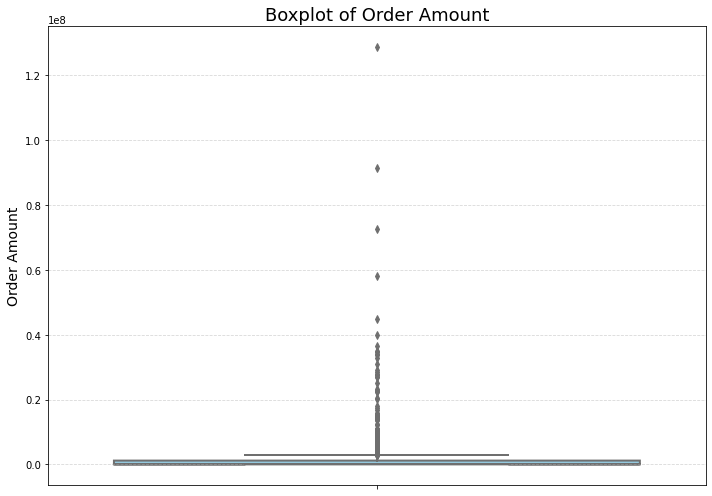

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 7))

# Customize the boxplot
sns.boxplot(data=df, y='ORDER_AMOUNT', color='skyblue', linewidth=2, notch=True)

# Set labels and title
plt.ylabel('Order Amount', fontsize=14)
plt.title('Boxplot of Order Amount', fontsize=18)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Set a tighter layout
plt.tight_layout()

# Show the plot
plt.show()

### Barchart on COMPANY_CODE and ORDER_AMOUNT

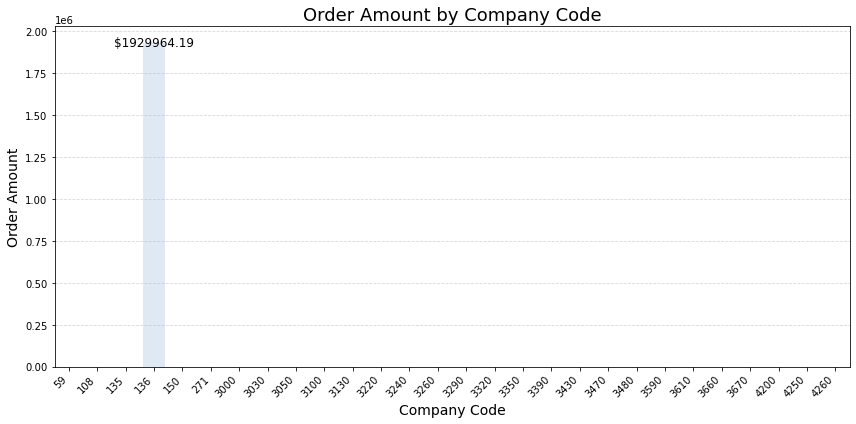

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Customize the bar plot
sns.barplot(data=df, x='COMPANY_CODE', y='ORDER_AMOUNT', ci=None, palette='Blues')

# Set labels and title
plt.xlabel('Company Code', fontsize=14)
plt.ylabel('Order Amount', fontsize=14)
plt.title('Order Amount by Company Code', fontsize=18)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f"${p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Set a tighter layout
plt.tight_layout()

# Show the plot
plt.show()

# Milestone 3- <font color=#32CD32>Feature Engineering and Selection</font>

<font color=#32CD32>Feature Engineering and Selection</font> are two crucial steps in the process of building predictive models from raw data.

Feature engineering involves transforming raw data into meaningful features that better represent the underlying patterns and relationships in the data. It aims to extract relevant information and create new features that enhance the performance of the model.

Feature selection involves selecting a subset of the most relevant features from the available set. The goal is to reduce dimensionality, eliminate irrelevant or redundant features, and improve model performance, interpretability, and efficiency.

### Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values

In [ ]:
mean = df['amount_in_usd'].mean()
std = df['amount_in_usd'].std()

# Define the threshold for outliers (e.g., values beyond mean ± 3 standard deviations)
threshold = 1.5

# Identify outliers using the threshold
outliers = df[(df['amount_in_usd'] > mean + threshold * std) | (df['amount_in_usd'] < mean - threshold * std)]

# Replace outliers with appropriate values (e.g., mean or median)
df.loc[outliers.index, 'amount_in_usd'] = df['amount_in_usd'].median()

# Print number of outliers
print("Number of outliers: ", len(outliers))

# Print the replaced outliers
print("Replaced outliers:")
print(outliers)

# Save the modified DataFrame to a new file or overwrite the original dataset
df.to_csv('modified_dataset.csv', index=False)

Number of outliers:  44
Replaced outliers:
        CUSTOMER_ORDER_ID  SALES_ORG         DISTRIBUTION_CHANNEL  \
2990            809195419       2884                      Nigeria   
4404            975817362       3691                      Liberia   
4920            979579904       2589     Northern Mariana Islands   
10407           986331564       3242                   Azerbaijan   
16922           777396947       2219         United Arab Emirates   
24214           891770326       3449                        Qatar   
33715           976933796       2600             French Polynesia   
48968           873662742       3710                   Kazakhstan   
65953           824779651       3946                Liechtenstein   
81101           902711639       3231                        Haiti   
95188           827407810       2663                       Malawi   
108086          992085640       2960  Falkland Islands (Malvinas)   
110291          826601812       3725                     Cam

### Label encoding or One hot Encoding on all the categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Step 1: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 2: Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Step 3: Apply label encoding to each categorical column
for column in categorical_columns:
    # Convert the column to string type to handle mixed data types
    df[column] = df[column].astype(str)
    df[column] = label_encoder.fit_transform(df[column])

# Print the encoded table
print(df)

         CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0                946851639       3537                   232         1   
1                963432061       3449                   135         1   
2                971991639       3238                   141         1   
3                754349803       3911                   228         1   
4                930253442       2381                    82         1   
...                    ...        ...                   ...       ...   
1101920          853605710       2498                    79         1   
1101921          998890898       4509                    10         1   
1101922          983330221       3951                   151         1   
1101923          926668029       3235                   167         1   
1101924          921701000       2968                   156         1   

         RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                            1                    0   

### Log Transformations on continuous columns

In [ ]:
import pandas as pd
import numpy as np

# Copy the original DataFrame
transformed_data = df.copy()

# Replace zeros with a non-zero value (e.g., 1)
transformed_data['ORDER_AMOUNT'] = transformed_data['ORDER_AMOUNT'].replace(0, 1)
transformed_data['amount_in_usd'] = transformed_data['amount_in_usd'].replace(0, 1)

# Apply log transformation to 'ORDER_AMOUNT' column
transformed_data['ORDER_AMOUNT'] = np.log(transformed_data['ORDER_AMOUNT'])

# Apply log transformation to 'amount_in_usd' column
transformed_data['amount_in_usd'] = np.log(transformed_data['amount_in_usd'])

# Display the transformed DataFrame
print(transformed_data.head())

   CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0          946851639       3537                   232         1   
1          963432061       3449                   135         1   
2          971991639       3238                   141         1   
3          754349803       3911                   228         1   
4          930253442       2381                    82         1   

   RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                      1                    0          3220   
1                      1                    0          3220   
2                  43900                  204          3260   
3                   7944                  255          3290   
4                      1                  255          3290   

   ORDER_CREATION_DATE  ORDER_CREATION_TIME  CREDIT_CONTROL_AREA  \
0             20220101                43012                    5   
1             20220101                43114                    2   
2             

### Try to extract new features by grouping existing columns

In [ ]:
import pandas as pd
import numpy as np

df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])
# Replacing -inf with median values in the 'ORDER_AMOUNT' column
median_order_amount = df['ORDER_AMOUNT'].median()
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].replace(-np.inf, median_order_amount)

# Group by 'ORDER_CREATION_DATE' and calculate mean order amount for each grouping
mean_order_amount_per_date = df.groupby('ORDER_CREATION_DATE')['ORDER_AMOUNT'].mean()

# Create a new feature by mapping the mean order amount to the respective date
df['MEAN_ORDER_AMOUNT_PER_DATE'] = df['ORDER_CREATION_DATE'].map(mean_order_amount_per_date)

# Print the updated DataFrame
print(df)

         CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION  \
0                946851639       3537                   232         1   
1                963432061       3449                   135         1   
2                971991639       3238                   141         1   
3                754349803       3911                   228         1   
4                930253442       2381                    82         1   
...                    ...        ...                   ...       ...   
1101920          853605710       2498                    79         1   
1101921          998890898       4509                    10         1   
1101922          983330221       3951                   151         1   
1101923          926668029       3235                   167         1   
1101924          921701000       2968                   156         1   

         RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE  \
0                            1                    0   

### Create a heatmap to find correlation between the columns

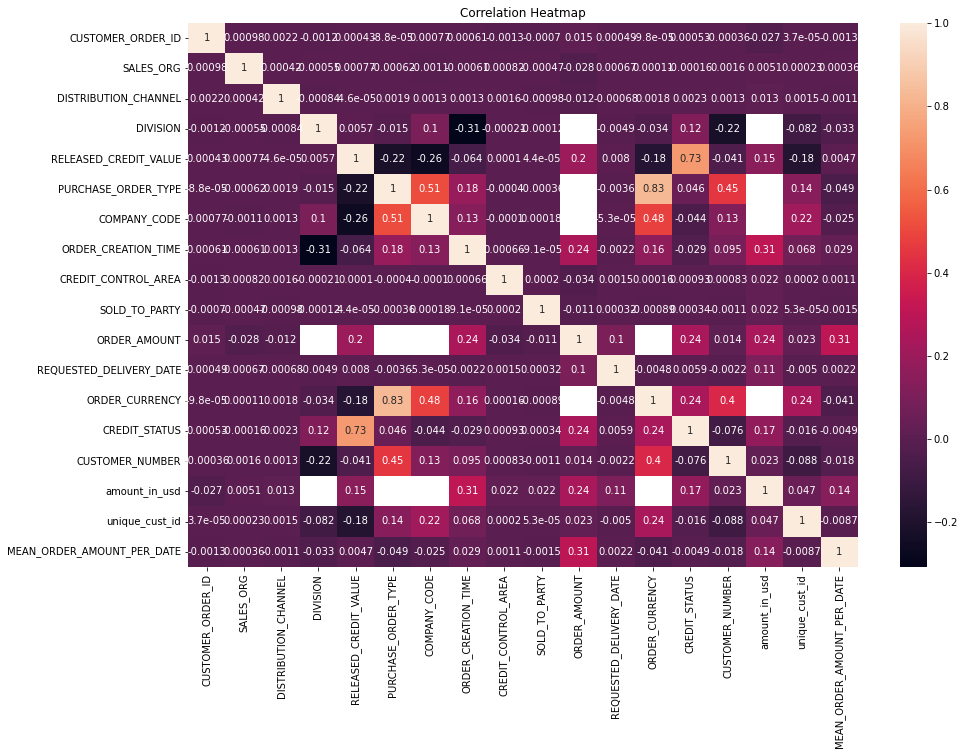

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Try to identify important or relevant columns for feature extraction

In [ ]:
correlation_matrix = df.corr()
threshold = 0.7

# Getting the highly correlated features
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

# Converting the set of highly correlated features to a list
highly_correlated_features = list(highly_correlated_features)

print(highly_correlated_features)

['PURCHASE_ORDER_TYPE', 'RELEASED_CREDIT_VALUE', 'CREDIT_STATUS', 'ORDER_CURRENCY']


# Milestone 4- <font color='orange'>ML Models and Evaluations</font>

<font color='orange'>Machine learning (ML) models</font> are algorithms that are designed to learn patterns and make predictions or decisions based on input data. These models play a crucial role in various applications such as image recognition, natural language processing, and predictive analytics. ML models are built using training data that consists of input features and corresponding target variables. The training process involves finding the optimal parameters or weights that minimize the error between the predicted outputs and the actual targets.

### Modify the dataset to pass into any type of machine learning models.

In [ ]:
df['ORDER_DAY'] = df['ORDER_CREATION_DATE'].dt.day
df['ORDER_MONTH'] = df['ORDER_CREATION_DATE'].dt.month
df

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,ORDER_AMOUNT,REQUESTED_DELIVERY_DATE,ORDER_CURRENCY,CREDIT_STATUS,CUSTOMER_NUMBER,amount_in_usd,unique_cust_id,RELEASED_CREDIT_log,ORDER_DAY,ORDER_MONTH
0,946851639,3537,232,1,0.00,0,3220,2022-01-01,43012,5,...,954.61,2022-01-13,6,0,12311807,1030.97880,6608,0.000000,1,1
1,963432061,3449,135,1,0.00,0,3220,2022-01-01,43114,2,...,787.36,2022-01-11,6,0,12311807,850.34880,6608,0.000000,1,1
2,971991639,3238,141,1,82342.02,204,3260,2022-01-01,110019,0,...,67493.46,2022-01-12,6,3,12118758,1809.60125,4405,11.318637,1,1
3,754349803,3911,228,1,1471.24,255,3290,2022-01-01,153013,5,...,1405.54,2022-01-06,6,3,1210499770,1517.98320,4059,7.293861,1,1
4,930253442,2381,82,1,0.00,255,3290,2022-01-01,160020,4,...,0.00,2022-01-06,6,2,1210351400,0.00000,2919,0.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101920,853605710,2498,79,1,0.00,306,4260,2022-06-01,74357,1,...,4415.19,2022-06-01,18,0,1210331804,1809.60125,2782,0.000000,1,6
1101921,998890898,4509,10,1,0.00,306,4260,2022-06-01,84052,3,...,0.00,2022-06-01,18,0,1210331804,0.00000,2782,0.000000,1,6
1101922,983330221,3951,151,1,0.00,306,4260,2022-06-01,85322,0,...,0.00,2022-06-01,18,0,1210331811,0.00000,2784,0.000000,1,6
1101923,926668029,3235,167,1,0.00,306,4260,2022-06-01,90538,7,...,0.00,2022-06-01,18,0,1210331811,0.00000,2784,0.000000,1,6


In [ ]:
x = df[['RELEASED_CREDIT_log', 'PURCHASE_ORDER_TYPE', 'CREDIT_STATUS', 'COMPANY_CODE', 'CUSTOMER_NUMBER', 'ORDER_DAY', 'ORDER_MONTH']]
y = df['amount_in_usd']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train)

         RELEASED_CREDIT_log  PURCHASE_ORDER_TYPE  CREDIT_STATUS  \
1069606             0.000000                  104              2   
729832              0.000000                  344              0   
580337              0.000000                  343              0   
430056              0.000000                  343              0   
1072256             5.320421                  104              3   
...                      ...                  ...            ...   
110439              0.000000                  104              0   
259644              6.187771                  104              3   
132227              7.982512                  104              3   
680622              0.000000                  343              0   
122166              0.000000                   51              0   

         COMPANY_CODE  CUSTOMER_NUMBER  ORDER_DAY  ORDER_MONTH  
1069606          3000       1230011794         11            4  
729832           3670       1230014212         28    

In [ ]:
print(y_train)

1069606      47.11200
729832        0.00000
580337      484.74000
430056     1194.88000
1072256     120.82200
              ...    
110439      120.10680
259644      470.03760
132227      108.94005
680622     1809.60125
122166        0.00000
Name: amount_in_usd, Length: 859826, dtype: float64


In [ ]:
print(x_test)

         RELEASED_CREDIT_log  PURCHASE_ORDER_TYPE  CREDIT_STATUS  \
339059              0.000000                  343              0   
991834              0.000000                  344              0   
969163              0.000000                  343              0   
603799              0.000000                  344              0   
1082462             0.000000                  104              2   
...                      ...                  ...            ...   
354996              0.000000                  343              0   
1023613             6.593592                  104              3   
1087847             0.000000                  104              2   
268180              0.000000                  205              0   
59919               0.000000                  105              0   

         COMPANY_CODE  CUSTOMER_NUMBER  ORDER_DAY  ORDER_MONTH  
339059           3660       1230014337          9            1  
991834           3670       1230014202         31    

In [ ]:
print(y_test)

339059      627.2400
991834      342.0000
969163      531.7700
603799       82.8000
1082462    1033.8575
             ...    
354996     1542.9700
1023613     431.6000
1087847      75.5300
268180        0.0000
59919       155.8224
Name: amount_in_usd, Length: 214957, dtype: float64


### Try different machine learning models like -

### <font color='orange'>Linear Regression</font>

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
MSE_Score = []
RMSE_Score = []
R2_Score = []
Algorithm = []

In [ ]:
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predicted = regressor.predict(x_test)

In [ ]:
predicted

array([496.99032997, 499.93578357, 501.38726431, ..., 421.87500225,
       400.83067799, 406.97347055])

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
RMSE_Score.append(mean_squared_error(y_test, predicted, squared=False))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression'],[319595.04418088053],[565.3273778801806],[0.05039415696103078],

### <font color='orange'>Decision Tree Regression</font>

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Algorithm.append('DecisionTreeRegression')
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

predicted = reg.predict(x_test)

In [ ]:
predicted

array([507.88098282, 464.32921687, 762.45689379, ..., 187.993     ,
         0.        , 168.49829647])

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
RMSE_Score.append(mean_squared_error(y_test, predicted, squared=False))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'DecisionTreeRegression'],[319595.04418088053, 196534.23475056104],[565.3273778801806, 443.3218184914442],[0.05039415696103078, 0.41604207864156184],

### <font color='orange'>Random Forest Regression</font>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Algorithm.append('RandomForestRegression')
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predicted=rf.predict(x_test)

In [ ]:
predicted

array([506.69645762, 463.06002221, 761.42071205, ..., 296.32601267,
         0.        , 166.75638455])

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
RMSE_Score.append(mean_squared_error(y_test, predicted, squared=False))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'DecisionTreeRegression', 'RandomForestRegression'],[319595.04418088053, 196534.23475056104, 188976.797853157],[565.3273778801806, 443.3218184914442, 434.71461656258697],[0.05039415696103078, 0.41604207864156184, 0.43849732745359116],

### <font color='orange'>XGBoost</font>

In [ ]:
import xgboost as xgb

Algorithm.append('XGBoost Algorithm')
reg = xgb.XGBRegressor()
reg.fit(x_train, y_train)
predicted = reg.predict(x_test)

In [ ]:
predicted

array([540.1911 , 576.41376, 692.0433 , ..., 502.91876,  66.66842,
       205.0325 ], dtype=float32)

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
RMSE_Score.append(mean_squared_error(y_test, predicted, squared=False))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'DecisionTreeRegression', 'RandomForestRegression', 'XGBoost Algorithm'],[319595.04418088053, 196534.23475056104, 188976.797853157, 206177.6544313307],[565.3273778801806, 443.3218184914442, 434.71461656258697, 454.06789627910354],[0.05039415696103078, 0.41604207864156184, 0.43849732745359116, 0.38738879429791273],

### <font color='orange'>Lasso</font>

In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(x_train, y_train)

best_alpha = lasso.alpha_
best_alpha

13259141.769412102

In [ ]:
from sklearn import linear_model

Algorithm.append('Lasso')
lasso = linear_model.Lasso(alpha=best_alpha)
lasso.fit(x_train, y_train)
predicted = lasso.predict(x_test)
predicted

array([506.61498897, 506.61497827, 506.61498937, ..., 505.03954605,
       410.08234909, 506.61546517])

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
RMSE_Score.append(mean_squared_error(y_test, predicted, squared=False))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'DecisionTreeRegression', 'RandomForestRegression', 'XGBoost Algorithm', 'Lasso'],[319595.04418088053, 196534.23475056104, 188976.797853157, 206177.6544313307, 335449.95299285185],[565.3273778801806, 443.3218184914442, 434.71461656258697, 454.06789627910354, 579.1804148906037],[0.05039415696103078, 0.41604207864156184, 0.43849732745359116, 0.38738879429791273, 0.003284809294873625],

### <font color='orange'>Gradient Boosting Regressor</font>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

Algorithm.append('Gradient Boosting Regressor')
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)
predicted = gb_regressor.predict(x_test)

predicted

array([632.39849423, 464.3870392 , 644.88049886, ..., 479.74325508,
       155.45540786, 261.9719936 ])

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
RMSE_Score.append(mean_squared_error(y_test, predicted, squared=False))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
for i in Algorithm, MSE_Score, RMSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'DecisionTreeRegression', 'RandomForestRegression', 'XGBoost Algorithm', 'Lasso', 'Gradient Boosting Regressor'],[319595.04418088053, 196534.23475056104, 188976.797853157, 206177.6544313307, 335449.95299285185, 255177.9285035862],[565.3273778801806, 443.3218184914442, 434.71461656258697, 454.06789627910354, 579.1804148906037, 505.1513916674745],[0.05039415696103078, 0.41604207864156184, 0.43849732745359116, 0.38738879429791273, 0.003284809294873625, 0.24179533965351063],

### Perform Regression model evaluations like MSE, RMSE, R-Square etc.

In [ ]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, RMSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'RMSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,RMSE_Score,R2_Score
0,LinearRegression,319595.044181,565.327378,0.050394
1,DecisionTreeRegression,196534.234751,443.321818,0.416042
2,RandomForestRegression,188976.797853,434.714617,0.438497
3,XGBoost Algorithm,206177.654431,454.067896,0.387389
4,Lasso,335449.952993,579.180415,0.003285
5,Gradient Boosting Regressor,255177.928504,505.151392,0.241795
